# Exercice 4

On fait les import necessaire.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy.signal import convolve2d

On récupére les données. On définit la fonction d'activation, le noyau ainsi que la méthode d'application de la convolution. On utilise ici convolve2d de scipy.signal puisque cela nous permet de conserver les bords de l'image. On utilise la fonction de convolution de numpy qui ne conserve pas les bords bien qu'elle soit plus rapide.

Number of iterations: 25


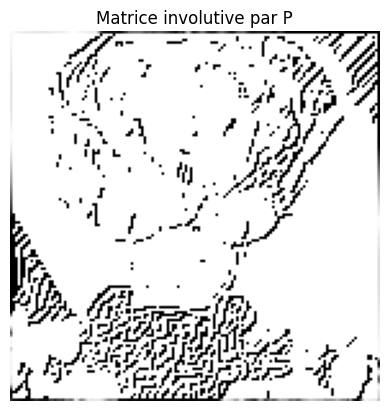

In [33]:
data_path: str = "data/Alien.jpeg"
image: np.ndarray = io.imread(data_path)

def activation(input: np.ndarray):
    return np.clip(input, 0, 255).astype(int)

kernel: np.ndarray = np.array([[-1.6, 0.4, 1.5], [0.1, 6.7, 0.1], [-1.5, 0.4, -1.6]])

def apply_kernel(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    if len(image.shape) != 2:
        raise ValueError('Image must be 2D')
    if len(kernel.shape) != 2:
        raise ValueError('Kernel must be 2D')
    if kernel.shape[0] % 2 == 0 or kernel.shape[1] % 2 == 0:
        raise ValueError('Kernel must have odd dimensions')
    if image.dtype is int:
        raise ValueError('Image must be interger type')
    if kernel.dtype not in (np.float32, np.float64):
        raise ValueError('Kernel must have floating point type')
    convolved: np.ndarray = convolve2d(image, kernel, mode='valid')
    return activation(convolved)

number_iterations: int = 100
border_rows: int = kernel.shape[0] // 2
border_cols: int = kernel.shape[1] // 2

zeros_matrix: np.ndarray = np.zeros(image.shape)
new_image: np.ndarray = image.copy()

for i in range(number_iterations):
    output: np.ndarray = apply_kernel(image, kernel)
    new_image[border_rows:-border_rows, border_cols:-border_cols] = output
    if np.array_equal(new_image, image):
        break
    image = new_image.copy()

print(f"Number of iterations: {i}")

plt.title("Matrice involutive par P")
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.show()


On obtient au bout de 25 itérations une matrice involutive part le noyau de convolution donnée.